## Principal Component Analysis

PCA is a statistical technique to speed up machine learning algorithms when the number of input features (or dimensions) is too high. PCA reduces the number of dimensions by transforming a large set of variables into a smaller one that contains most of the information in the original large set.

### Dimensionality Reduction

#### Feature Elimination

Your first idea is to remove a good amount of features so the model won’t be run using every column. This is called feature elimination.

Feature elimination means what you think: You remove, or eliminate, a feature from the dataset. In our school supply example, you remove features that aren’t relevant to what we’re looking for, such as name, address, and zip code. This simple method increases and maintains interpretability.

The downside is, once you remove that feature, you can no longer glean information from it. If we want to know the likelihood of people buying school supplies, but we removed the zip code feature, then we’d miss a detail that could help us understand when certain residents tend to purchase school supplies.

#### Feature Extraction

Feature extraction combines all features into a new set that is ordered by how well they predict our original variable.

In other words, feature extraction reduces the number of dimensions by transforming a large set of variables into a smaller one. This smaller set of variables contains most of the important information from the original large set.

In [1]:
# Import Dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import hvplot.pandas

In [3]:
# Loading the preprocessed iris dataset
file_path = "new_iris_data.csv"
df_iris = pd.read_csv(file_path)
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# Standardize data with StandardScaler
iris_scaled = StandardScaler().fit_transform(df_iris)
print(iris_scaled[0:5])

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


Now that the data has been standardized, we can use PCA to reduce the number of features. The PCA method takes an argument of n_components, which will pass in the value of 2, thus reducing the features from 4 to 2:

In [6]:
# Initialize PCA model
pca = PCA(n_components=2)

After creating the PCA model, we apply dimensionality reduction on the scaled dataset:

In [7]:
# Get two principal components for the iris data.
iris_pca = pca.fit_transform(iris_scaled)

After this dimensionality reduction, we get a smaller set of dimensions called principal components. These new components are just the two main dimensions of variation that contain most of the information in the original dataset.

The resulting principal components are transformed into a DataFrame to fit K-means:

In [8]:
# Transform PCA data to a DataFrame
df_iris_pca = pd.DataFrame(
    data=iris_pca, columns=["principal component 1", "principal component 2"])
df_iris_pca.head()

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


Use explained_variance_ratio to learn how much information can be attributed to each principal component:

In [9]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

What this tells us, is that the first principal component contains 72.77% of the variance and the second contains 23.03%. Together, they contain 95.80% of the information.

Next, we’ll use the elbow curve with the generated principal components and see the K value is 3:

In [10]:
# Find the best value for K
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of K values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_iris_pca)
    inertia.append(km.inertia_)

# Create the elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

:Curve   [k]   (inertia)

Use the principal components data with the K-means algorithm with a K value of 3. We could consider 2, but the direction shifts more after 3:

In [11]:
# Initialize the K-means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(df_iris_pca)

# Predict clusters
predictions = model.predict(df_iris_pca)

# Add the predicted class columns
df_iris_pca["class"] = model.labels_
df_iris_pca.head()

,principal component 1,principal component 2,class
0,-2.264542,0.505704,1
1,-2.086426,-0.655405,1
2,-2.367950,-0.318477,1
3,-2.304197,-0.575368,1
4,-2.388777,0.674767,1


Finally, we can plot the clusters. Instead of a 3D plot, the data is easier to analyze with only two features:

In [12]:
df_iris_pca.hvplot.scatter(
    x="principal component 1",
    y="principal component 2",
    hover_cols=["class"],
    by="class",)

:NdOverlay   [class]
   :Scatter   [principal component 1]   (principal component 2,class)

## Mean, Variance, and Covariance

There is a mathematical way to use feature extraction, but first let’s review some stats concepts.

#### Mean

Recall that the mean is the sum of a group of numbers divided by the total amount of numbers. 

#### Variance

Variance is the square distance from each point from the center, added together, and divided by the total number of points. The variance measures the spread of a set of numbers.
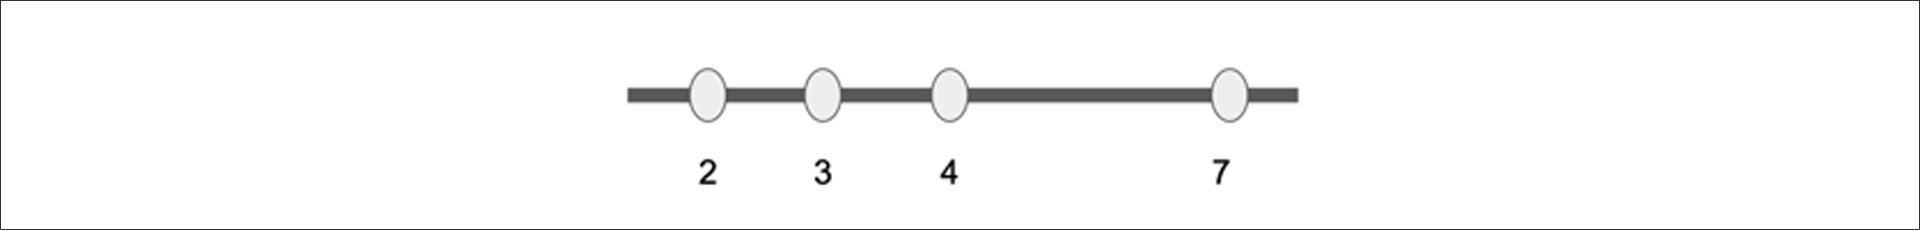


The distance from 4 to 2 is -2, the distance from 4 to 3 is -1, the distance from 4 to 4 is 0, and the distance from 4 to 7 is 3.

Add up the squares of each distance: (-2)^2 + (-1)^2 + (0)^2 + (3)^2 = 4 + 1 + 0 + 9 = 14.

Finally, divide the distances by the total number of points: 14 / 4. The variance equals 14/4, or 3½.
Note:
These examples showed points on the x-axis, and thus, form the x variance. The same process applies to elements on the y-axis, forming the y variance.

#### Covariance

How can we tell the difference between the points that lie along Line A versus the points that lie along Line B?

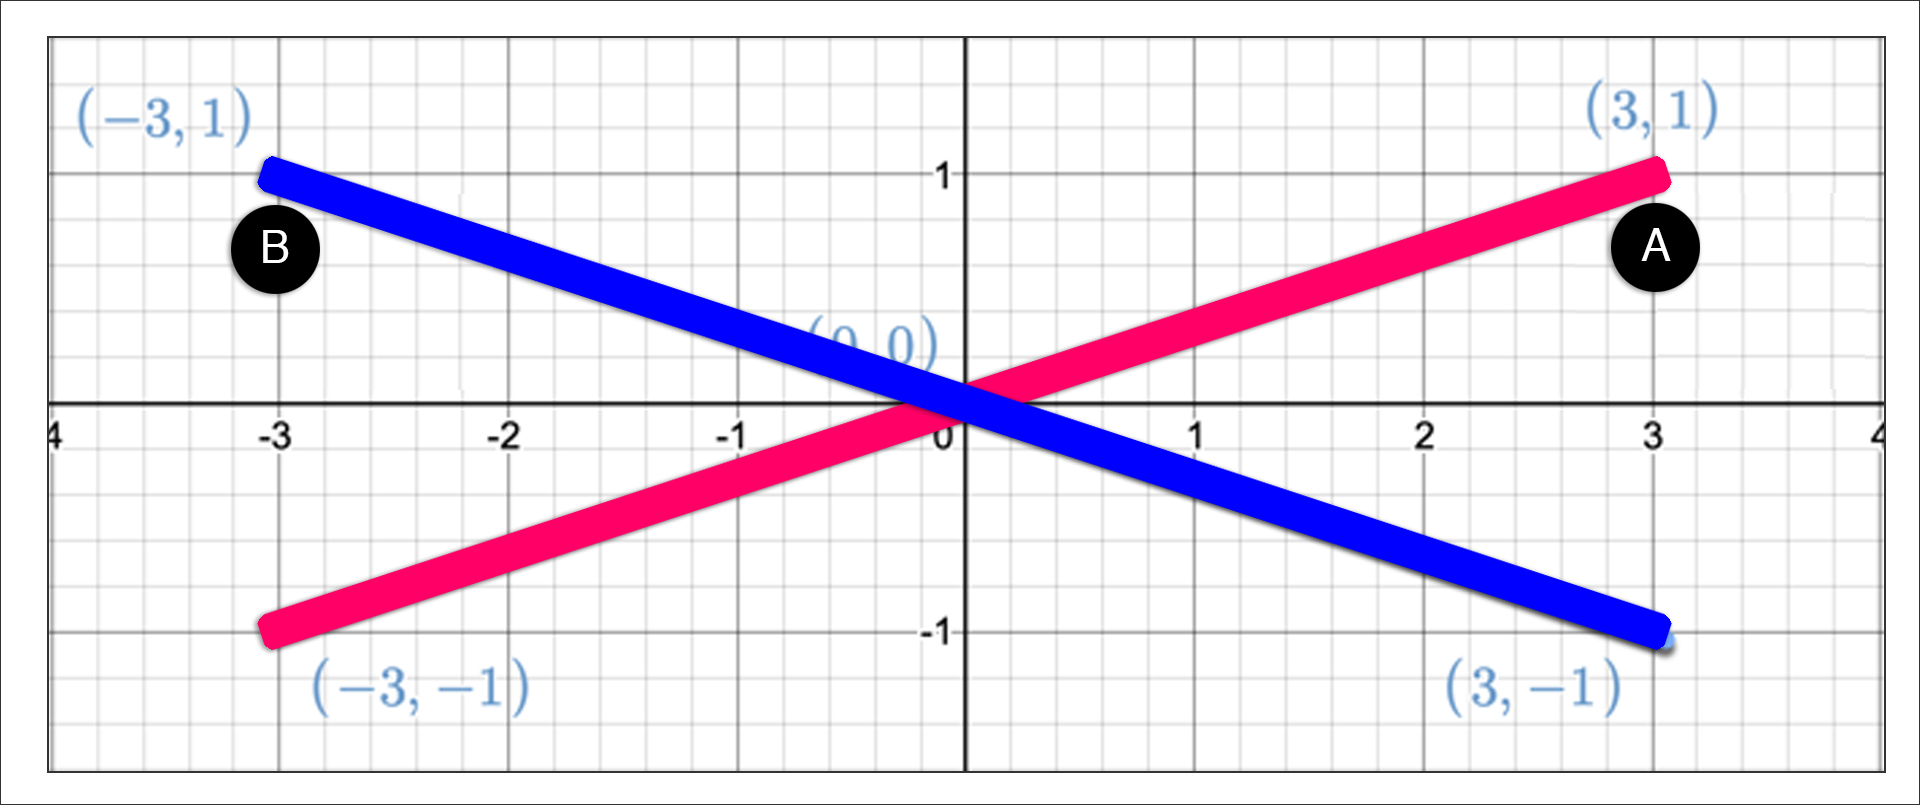

We can do this with the product of coordinates, which is the multiple of each of the two points:

Covariance is the sum of the product of coordinates divided by the number of points.

For the points along Line A, it’s (3) + (0) + (3) = 6, divided by the total number of points, which is 6 / 3 = 2.

For the points along Line B, it’s (-3) + (0) + (-3) = -6, divided by the total number of points, which is -6 / 3 = -2.

The covariance for Line A is -2 while the covariance for Line B is 2.

We can then say that Line A has a negative covariance (at -2) while Line B has a positive covariance (at 2). There is also a third type of covariance called covariance zero. This is when the points tend to form a horizontal line.

## Linear Transformations

Say we have a set of points on a graph. We want to center these points by taking the average of the coordinate, both X and Y. Find the balance point and move that to zero:
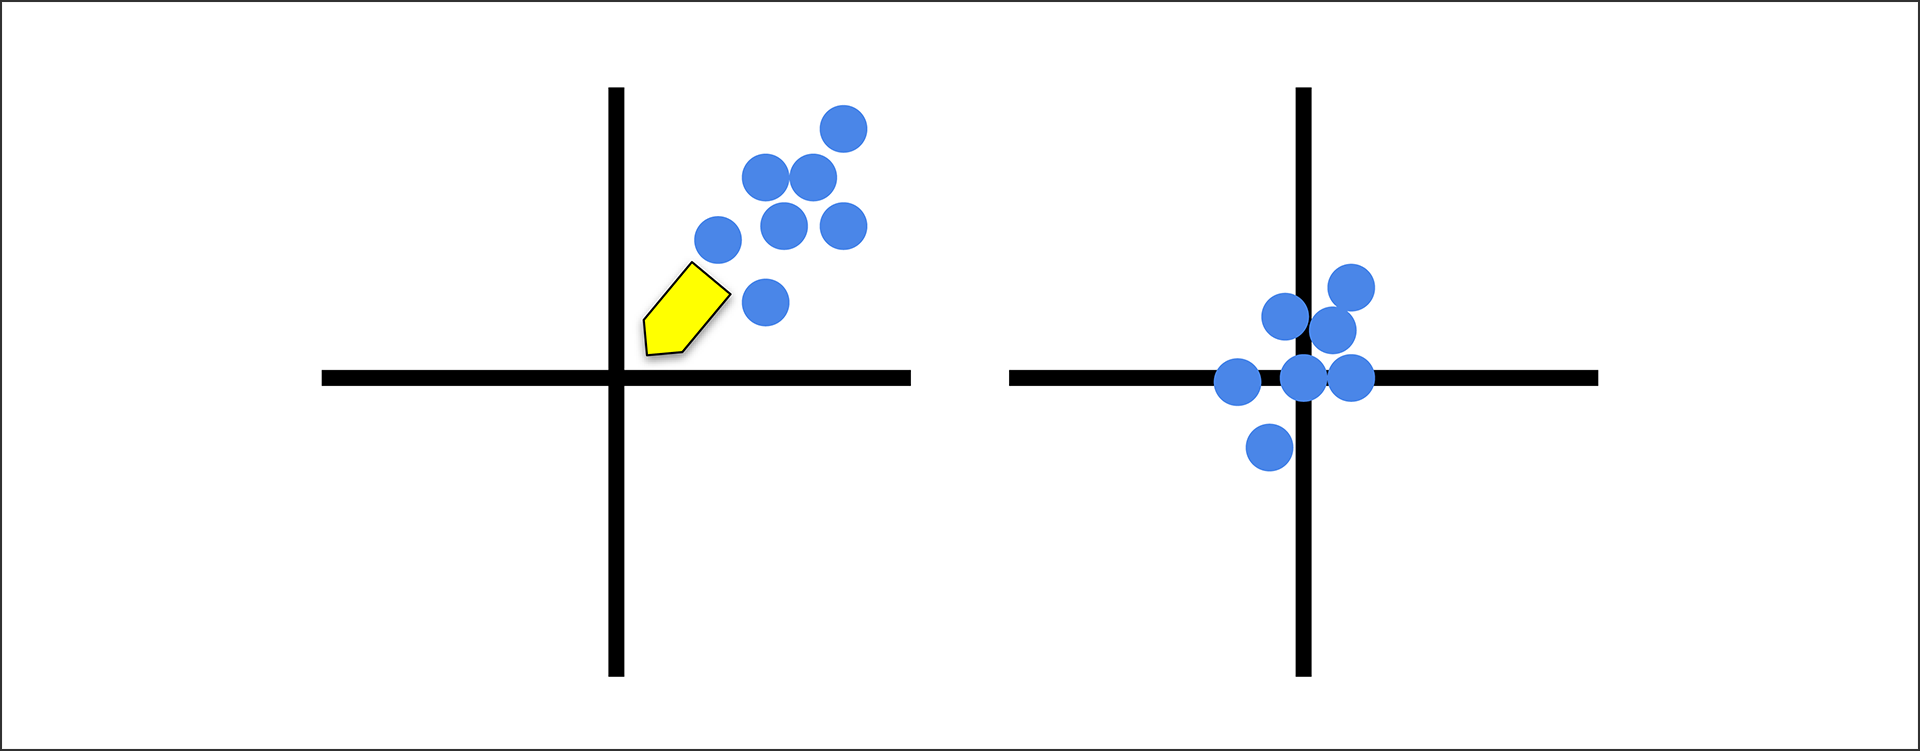

Once the points are centered, we’re going to create a 2x2 matrix that consists of the variance and covariances that we found in the previous step:

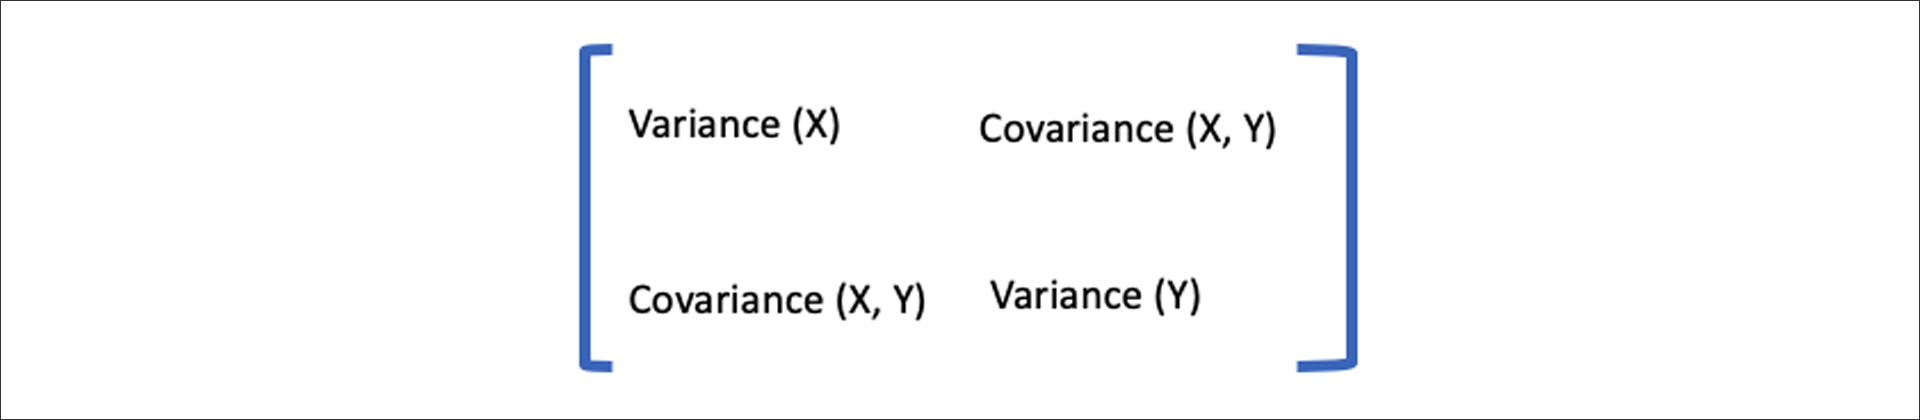

So, let's say the matrix above contains the following:
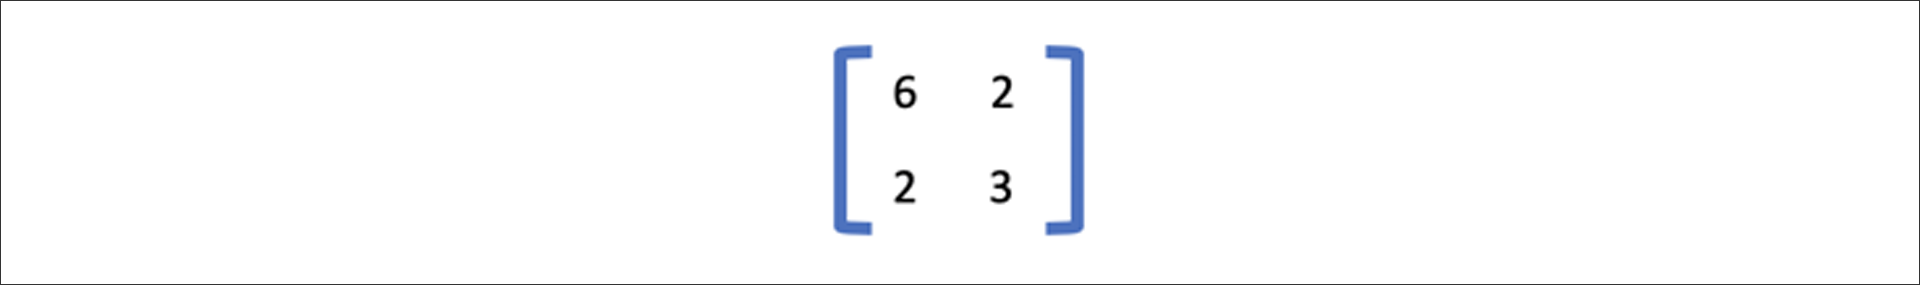

This matrix will be used to transform the points from one graph to another by using the numbers to create a formula for our transformation. The top two values of the matrix will correspond to one point and the bottom two values to another.

In our example, the formula for the points becomes (6x + 2y, 2x, + 3y). Let’s plug some coordinates into the formula:

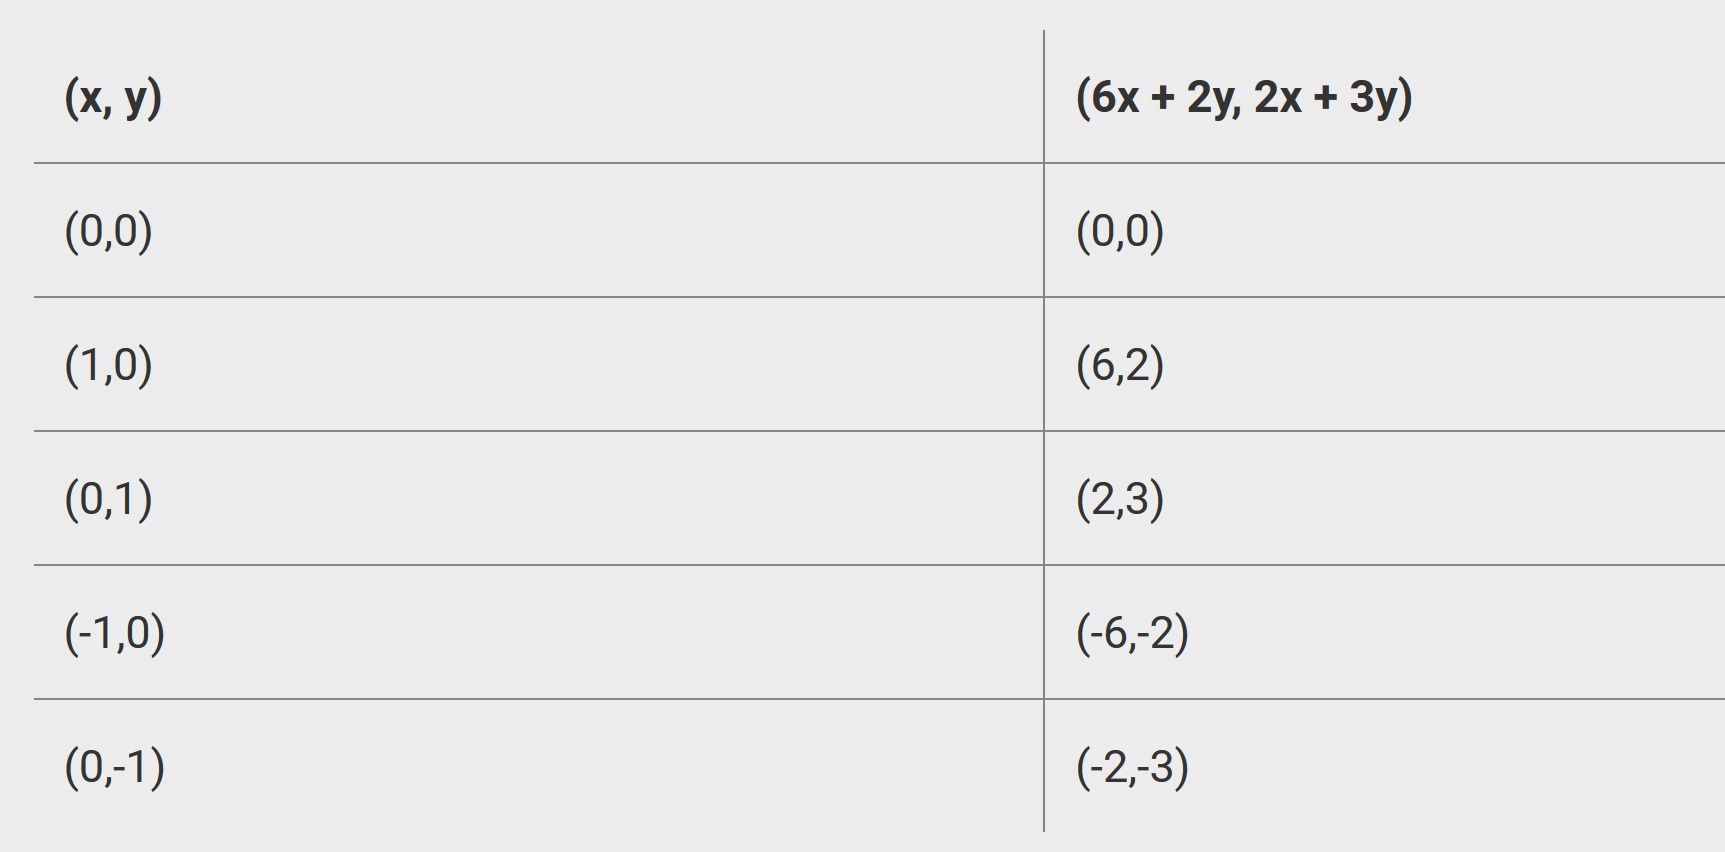

### Eigenvectors and Eigenvalues

https://www.wolframalpha.com/input/?i=eigenvalues

There is a way to figure out the vectors and values with algebra, but we use the calculator on WolframAlpha (Links to an external site.) to simplify the process. Plug in our matrix of {{6,2},{2,3}}, then click calculate.

From the results website, you can see in one direction the shape stretched to a value of 7 and another to a value of 2. The magnitude that each of these stretches is called the eigenvalue:

We also see the direction that stretched with the eigenvectors of (2, 1) and (-1, 2):

The big takeaway from eigenvectors and eigenvalues is that they show us the spread of the dataset and by how much.

### PCA’s Underlying Theory

Now it’s time to put everything together and show how PCA works. Given our two eigenvalues from before, 7 and 2, take the greater eigenvalue, 7, and eliminate the other since it’s less important. The higher eigenvalue is the axis that carries the most amount of information.

We’ll also take the corresponding eigenvector, which is (2,1).

Next, extend that eigenvector with the higher value to a line and project all our points onto that line:

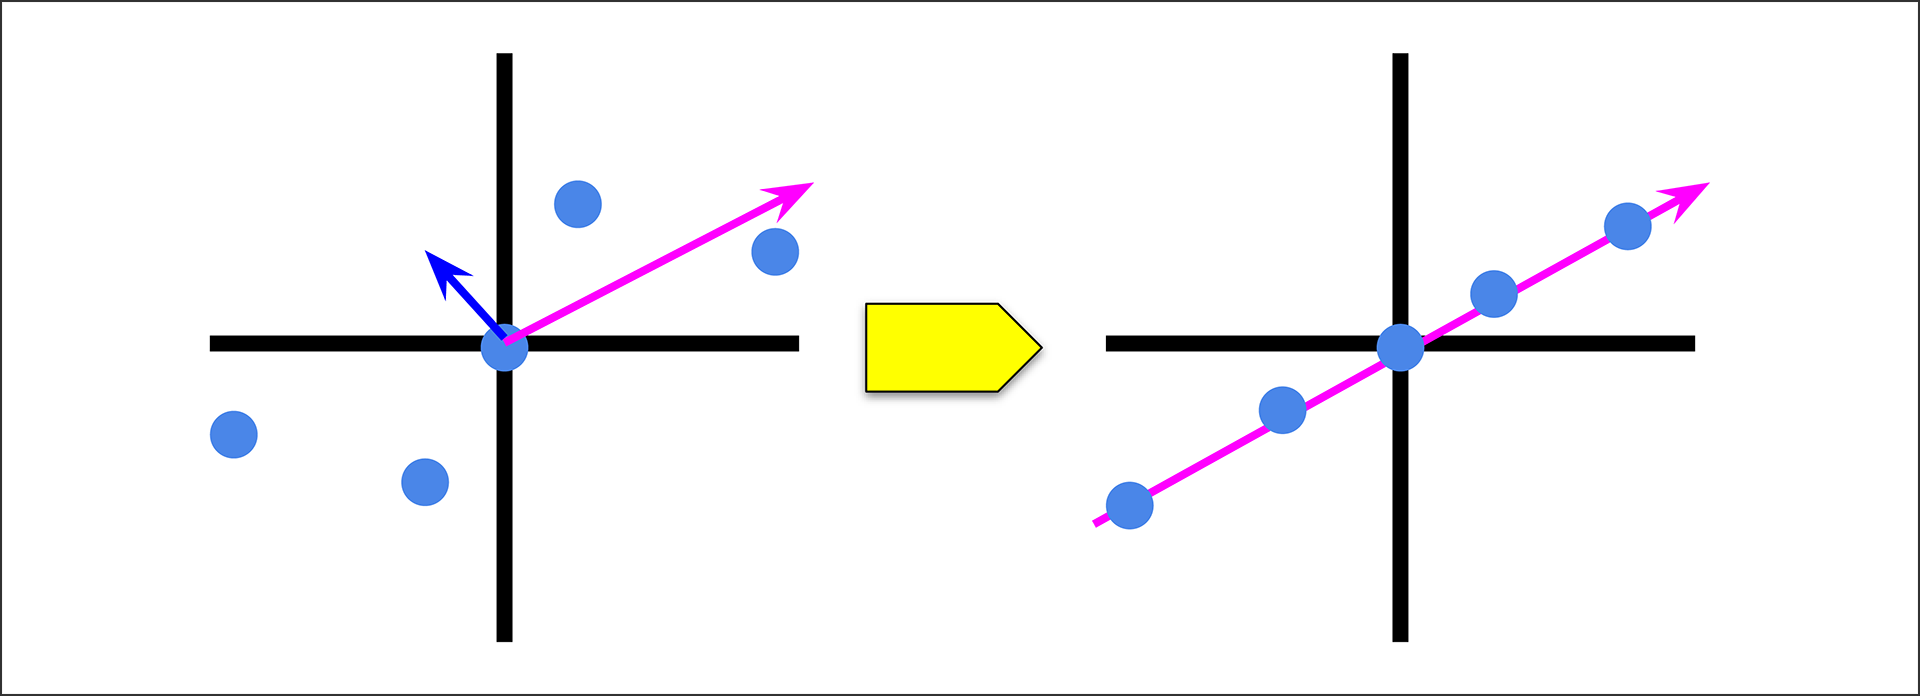

Now let’s put everything together and show what PCA is doing. We’ll up the ante a little bit and expand from two to five columns of data. First, take our data that consists of five columns, or features. Note, the asterisk (*) will represent a number as we’ll avoid using numbers to simplify the exercise:

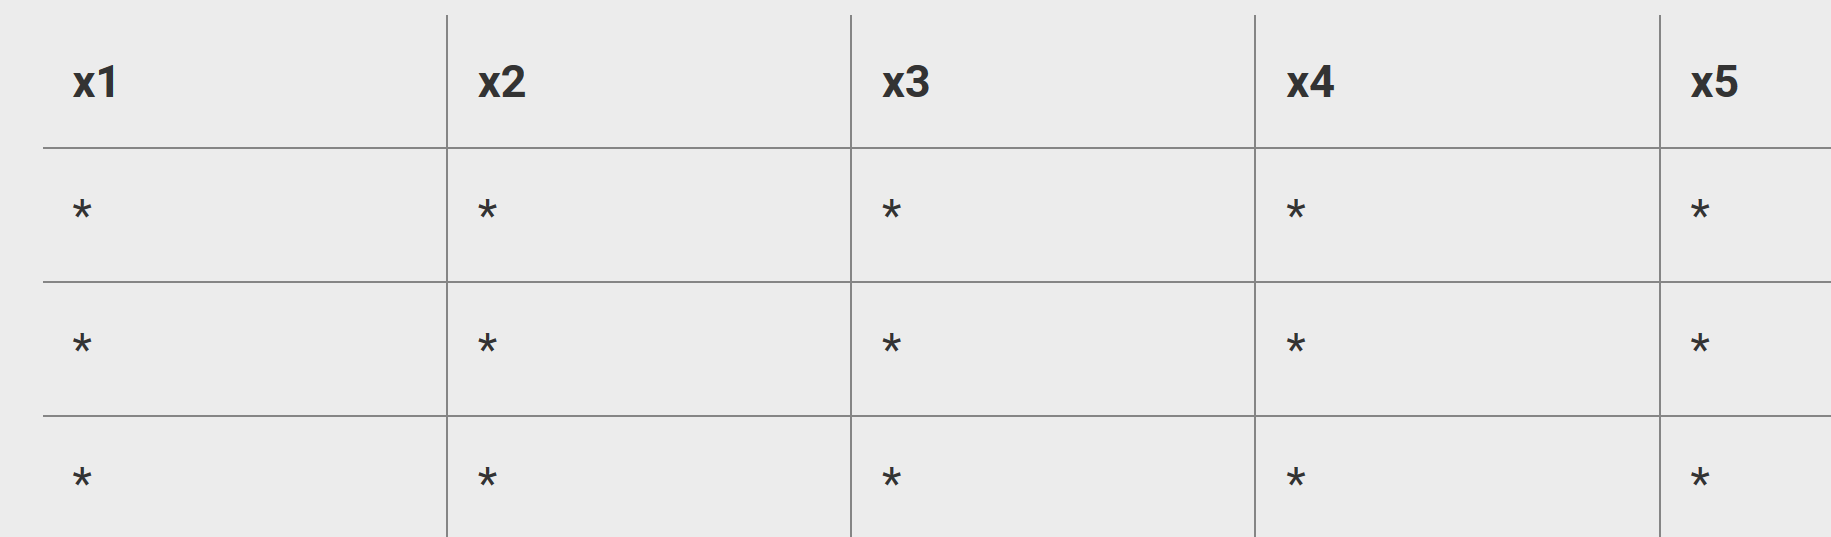

Put all the data points into a 5x5 covariance matrix. The eigenvectors and eigenvalues are calculated for each of those five columns in the matrix. Again, the asterisk (*) represents a number:

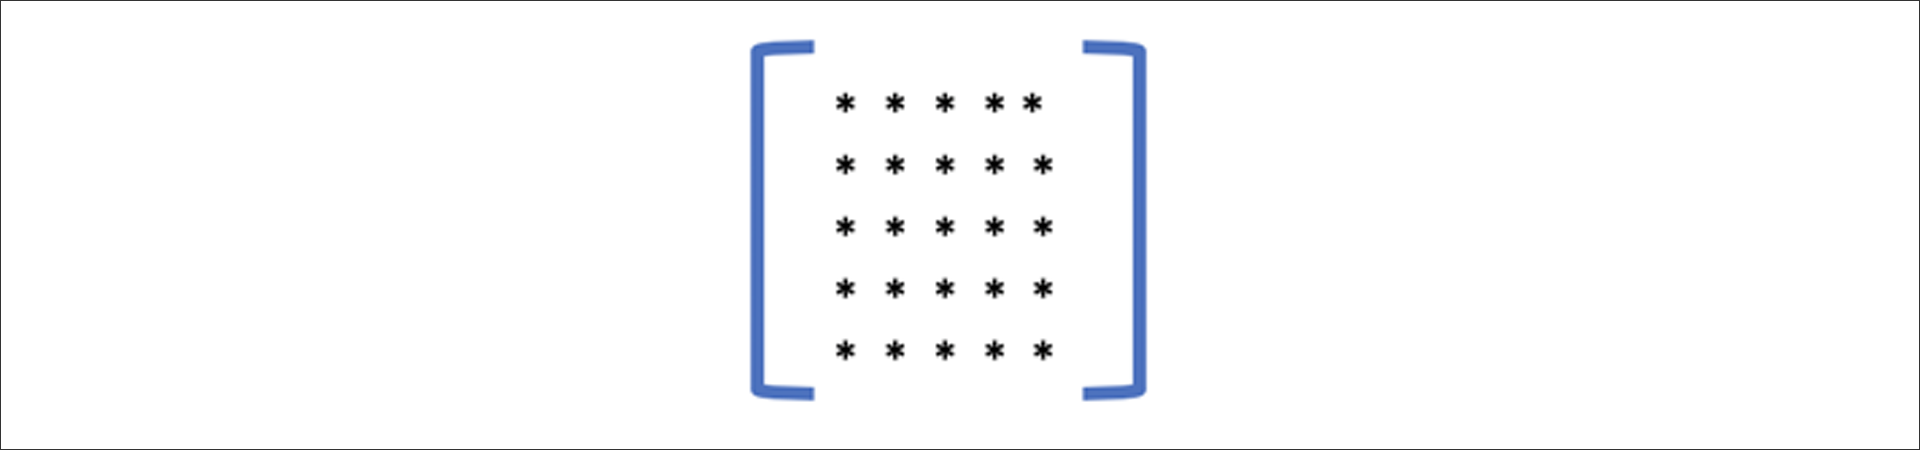

From the matrix we can produce a list of eigenvectors and corresponding eigenvalues:

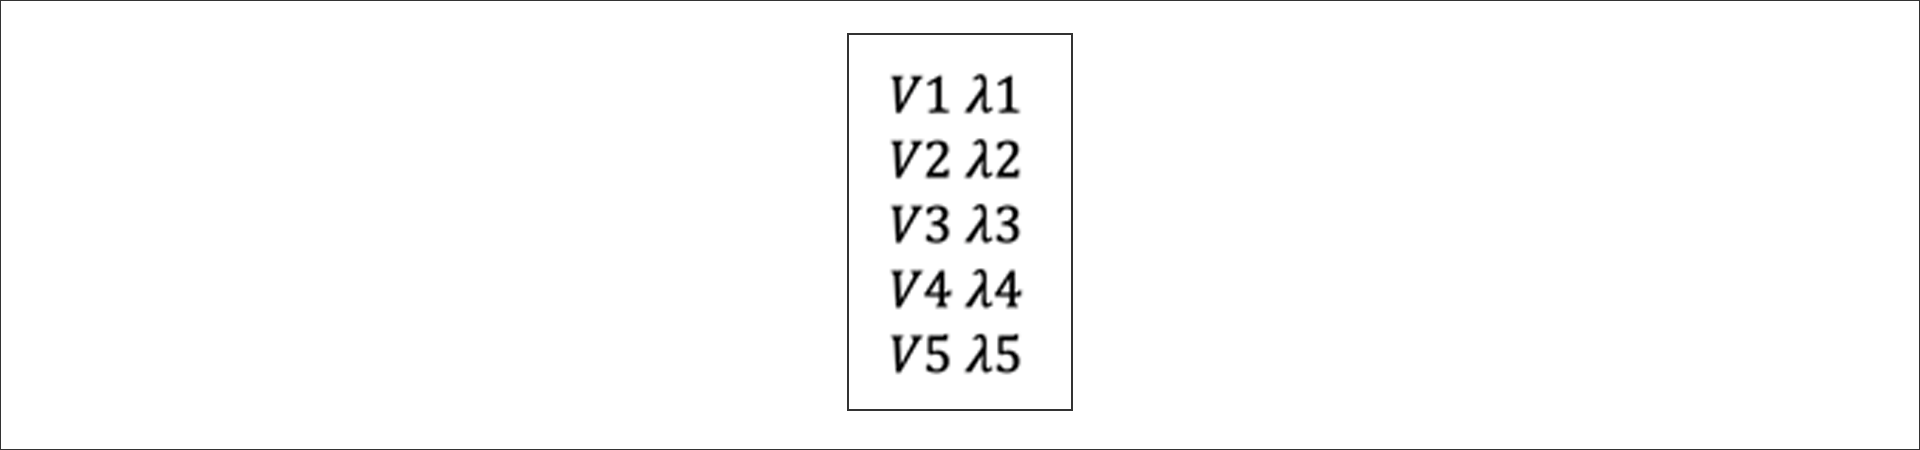

We pick how many eigenvalues we want to keep and which to drop. For this example, we’ll keep the top two eigenvalues and drop three:

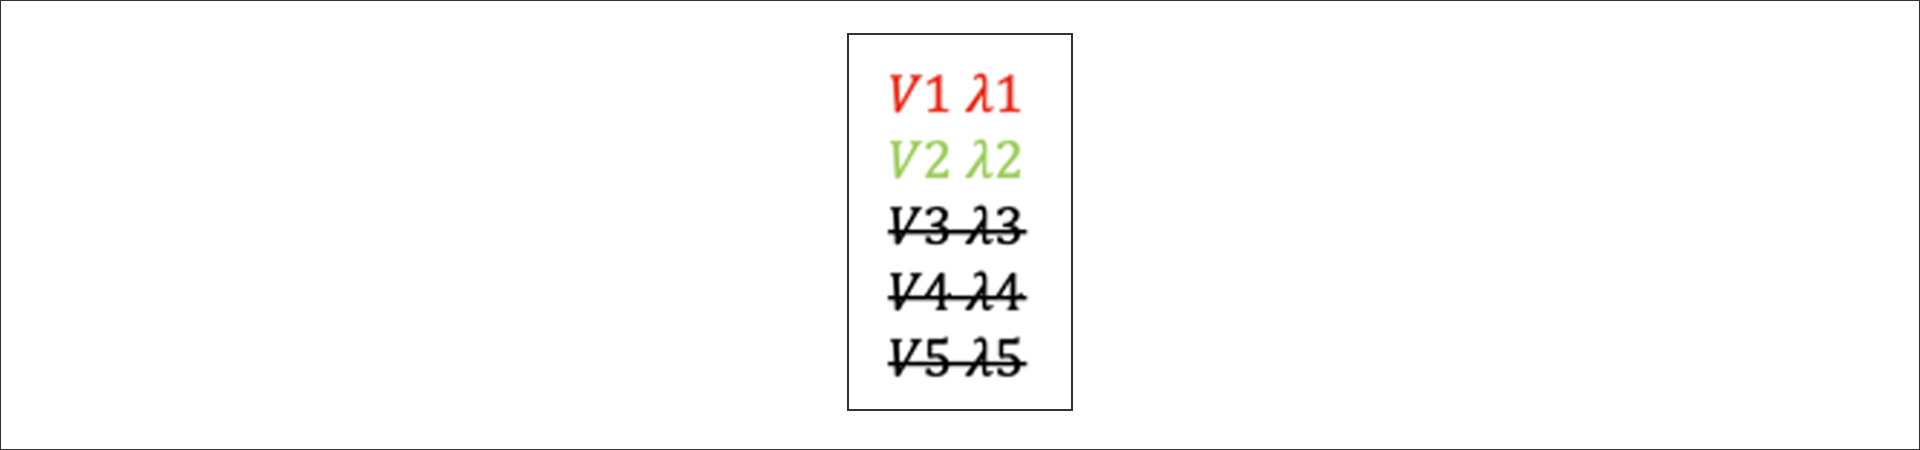

Taking two will allow us to plot on a 2D plane. The two eigenvalues and eigenvectors will create a plane on which all the points can be plotted:

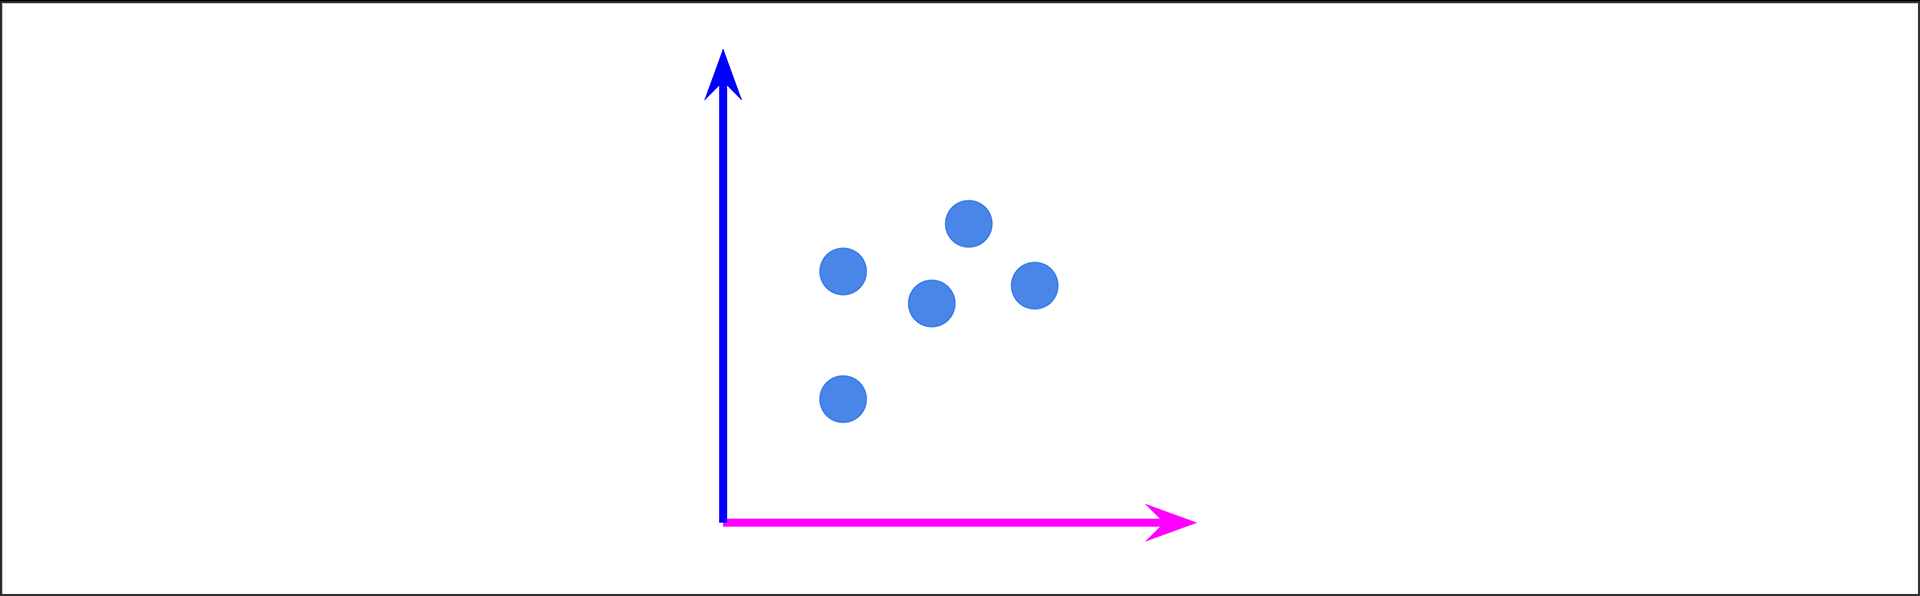

This now narrows down our five features to two and gives us a good snapshot of what the data should look like because we chose the directions the data spread the most.

Finally, these data points will give us a table of two columns, where the asterisk (*) is a number. Remember, when we coded PCA, the end result was two columns of principal components:

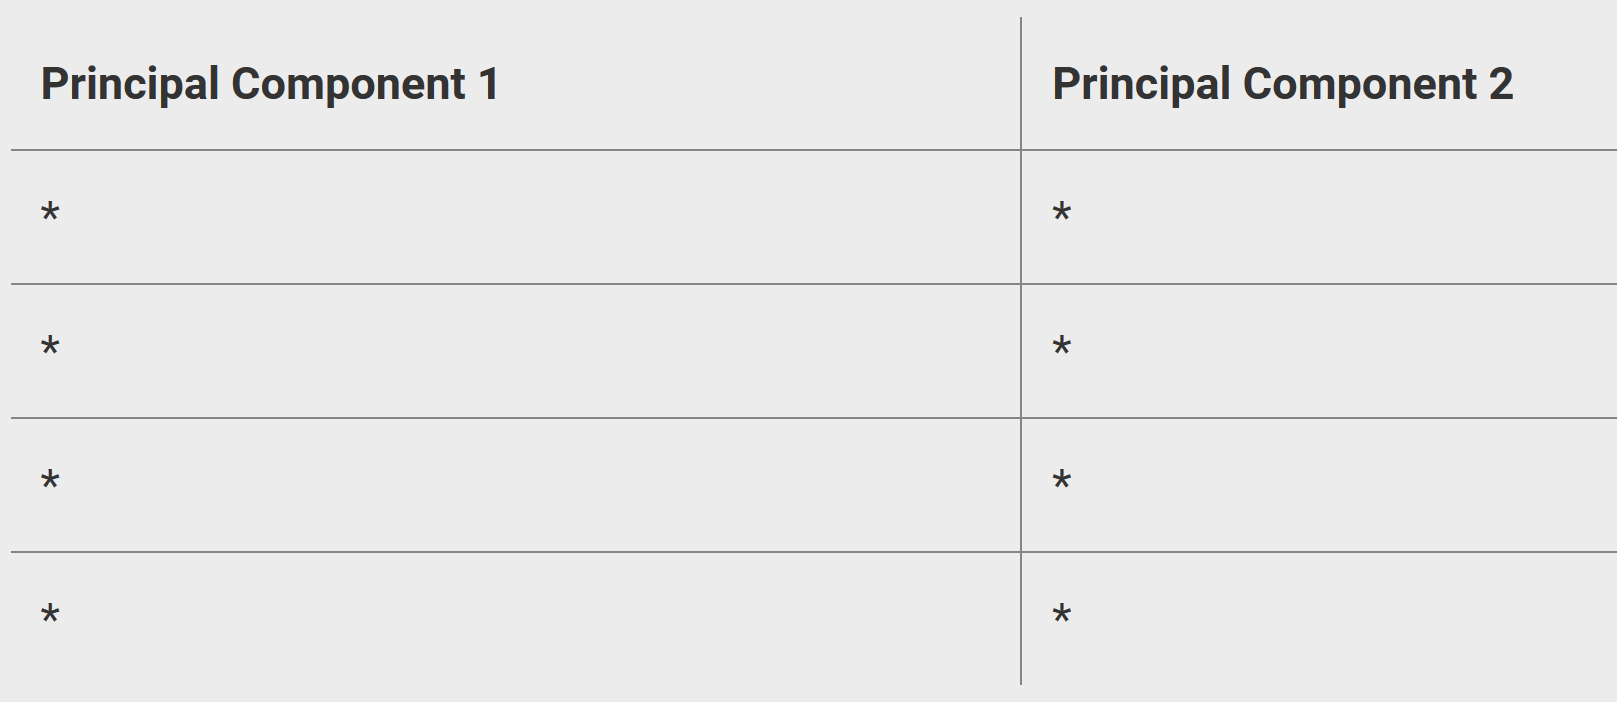

The statistics, linear transformations, and eigenvalues and eigenvectors all illustrate how PCA works. As you saw earlier, it is much easier to code than do all of this math. So, don’t worry if this is confusing—remember, you’ve already coded it! It is important to understand, on some level, what PCA is doing in case you’re ever asked in an interview.

Thankfully, code has made our work easier and now you have a better understanding of how to reduce dimensions yet still keep the values.